# Sample Project #
## Who were more likely to survive the Titanic disaster? ##

In this project, we use the publicly available data about the passengers of the Titanic (https://www.kaggle.com/competitions/titanic/data) to try and predict which passengers were more likely to survive the shipwreck. Also, the 1997 movie *Titanic* shows women were allowed to board the lifeboats before men, and first class passengers were granted priority access to the lifeboats. We will try to see if this is true.

We only use the training data from the dataset since the test data does not have the survival ground truths.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\keann\OneDrive\Documents\CS 250\Titanic\train_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the column headers, we can see that the columns *PassengerID*, *Name*, *Ticket* and *Cabin* are just random values assigned to passengers, so shouldn't be allowed to influence our prediction. We will drop these columns.

In [3]:
data.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis=1,inplace=True) # the actually column is dropped if true, and a copy of the data without the columns is created if false
data.head() # these columns are removed because we cannot conduct correlation with string columns

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We'll create a labels array from *Survived* and drop the *Survived* column. Also, we'll convert the *Sex* and *Embarked* column to numbers using different methods. Besides, we'll clean up the data a little.

In [4]:
data.isna().sum() #this gives the number of NaN values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
data = data.dropna(subset=['Embarked'])
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
labels = np.array(data.Survived)
data['Sex'] = np.uint8(data.Sex =='male') # converting SEX to 1 or zeros # since it's only 2, male or female, it doesnt matter which one you assign 1 or 0
data['Emb_S'] = np.uint8(data.Embarked=='S') #these 3 lines splits a column and assign each of these values with a value of 1 each type they show up
data['Emb_C'] = np.uint8(data.Embarked=='C')
data['Emb_Q'] = np.uint8(data.Embarked=='Q')
data.drop(['Survived','Embarked'],axis=1,inplace=True) # dropping the survive column because this is what we want to guess so it cannot be a part of the data, toherwise you'd get perfect correlation
data.head()


AttributeError: 'DataFrame' object has no attribute 'Survived'

In [14]:
labels

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [15]:
data.head(30)

,Pclass,Sex,SibSp,Parch,Fare,Emb_S,Emb_C,Emb_Q
0,3,1,1,0,7.2500,1,0,0
1,1,0,1,0,71.2833,0,1,0
2,3,0,0,0,7.9250,1,0,0
3,1,0,1,0,53.1000,1,0,0
4,3,1,0,0,8.0500,1,0,0
5,3,1,0,0,8.4583,0,0,1
6,1,1,0,0,51.8625,1,0,0
7,3,1,3,1,21.0750,1,0,0
8,3,0,0,2,11.1333,1,0,0
9,2,0,1,0,30.0708,0,1,0


In [7]:
data.shape

(889, 9)

The situation with age is a little complicated.

There are 177 rows with age *NaN*. We could replace these with the average age. However, there are two things to consider:

1. We must split the data into train and test sets, and then use the average of the training set to replace all ages. So if we do this, it has to be done after train_test_split()
2. Age will probably have a big effect on survival (at least intuitively it seems so). So just replacing age with an average value may not be a good idea.

So considering all things, we decided to drop that column.

In [8]:
data.drop(['Age'],axis=1,inplace=True)
data.head()

,Pclass,Sex,SibSp,Parch,Fare,Emb_S,Emb_C,Emb_Q
0,3,1,1,0,7.2500,1,0,0
1,1,0,1,0,71.2833,0,1,0
2,3,0,0,0,7.9250,1,0,0
3,1,0,1,0,53.1000,1,0,0
4,3,1,0,0,8.0500,1,0,0


Probably *Pclass* and *Fare* columns have a strong correlation (negative, singe a lower class having a lower fare is shown by a higher number). There maybe other fields that are correlated. Let's find out.

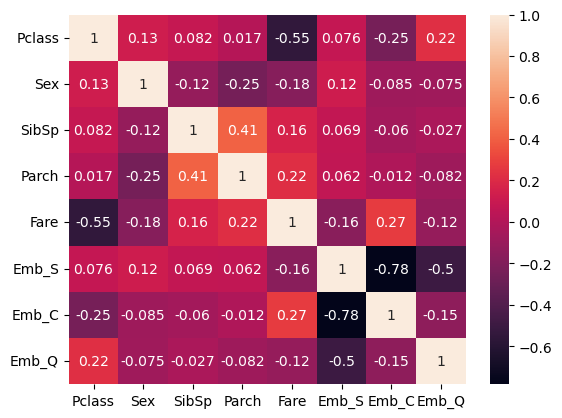

In [9]:
import seaborn as sn
   
# plotting correlation heatmap
dataplot = sn.heatmap(data.corr(),annot=True) # data.corr takes all the numeric columns and do correlation analysis
  
# displaying heatmap
plt.show()

Let's visualize the data a little. What percentage of people boarded at each of the ports?

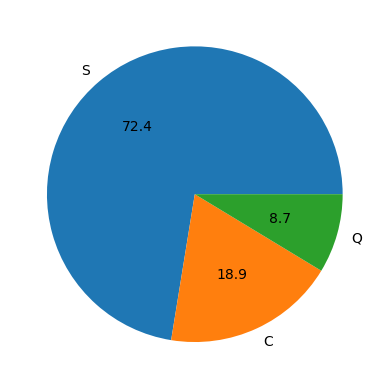

In [10]:
plt.pie([data.Emb_S.sum(),data.Emb_C.sum(),data.Emb_Q.sum()],labels=['S','C','Q'],autopct='%.1f')
plt.show()

How about the fare? How many people paid what fare?

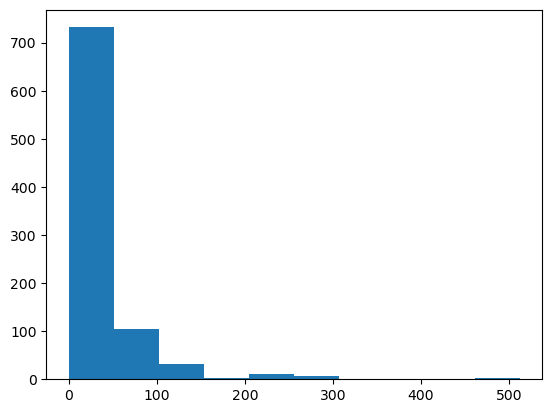

In [11]:
plt.hist(data.Fare)
plt.show()

How were the classes and sexes distributed on the ship, and among those who survived?

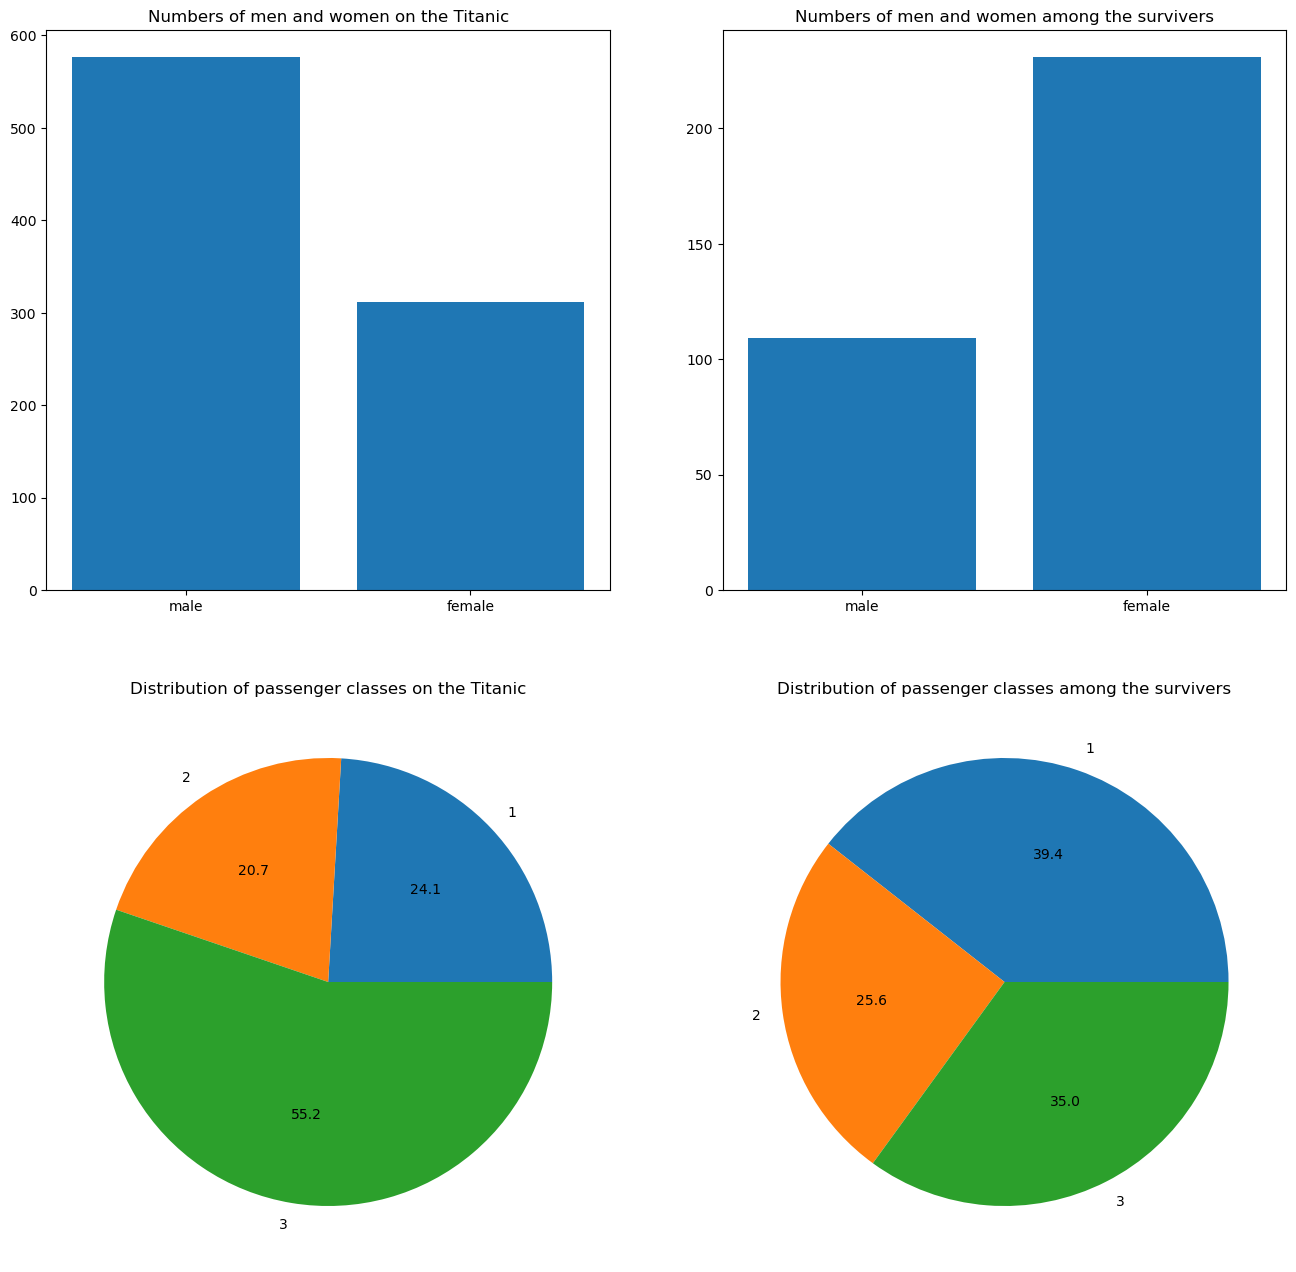

In [37]:
fig = plt.figure(figsize = [16,16])

plt.subplot(2,2,1)
plt.bar(['male','female'],[data.Sex.sum(),len(data)-data.Sex.sum()])
plt.title('Numbers of men and women on the Titanic')

plt.subplot(2,2,2)
temp = data[labels==1]  # since labels data is survived, where labels == 1 is where a person survived
plt.bar(['male','female'],[temp.Sex.sum(),len(temp)-temp.Sex.sum()])
plt.title('Numbers of men and women among the survivers')

plt.subplot(2,2,3)
plt.pie([len(data[data.Pclass==1]),len(data[data.Pclass==2]),len(data[data.Pclass==3])],labels=[1,2,3], autopct='%.1f')
plt.title('Distribution of passenger classes on the Titanic')

plt.subplot(2,2,4)
plt.pie([len(temp[temp.Pclass==1]),len(temp[temp.Pclass==2]),len(temp[temp.Pclass==3])],labels=[1,2,3], autopct='%.1f')
plt.title('Distribution of passenger classes among the survivers')

plt.show()

## So the movie was right ##

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial',max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

<AxesSubplot:>

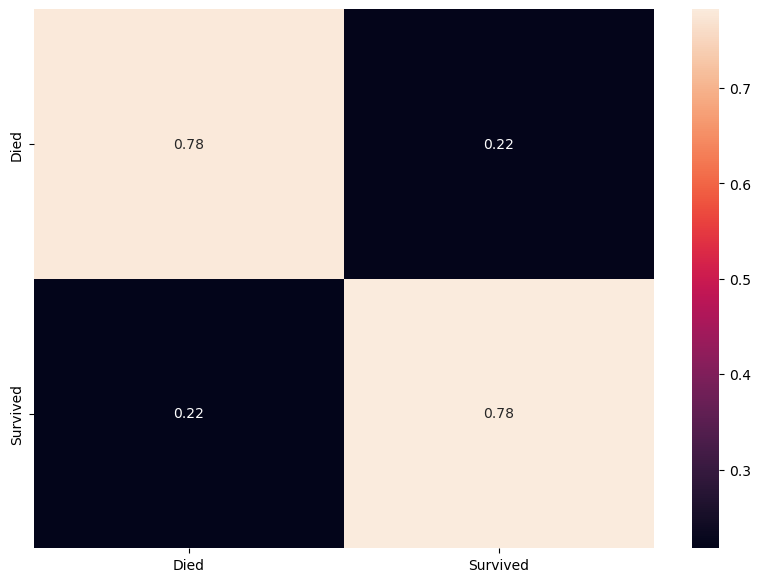

In [40]:
#Visualize performance by Normalized confusion matrix
import seaborn as sn
numClasses = 2
label = ['Died','Survived']
conf = np.zeros([numClasses,numClasses])
guesses = model.predict(X_test)

for passenger in range(len(y_test)):
    real = y_test[passenger]
    guess = guesses[passenger]
    conf[real,guess] = conf[real,guess] + 1

rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in label],
                  columns = [i for i in label])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

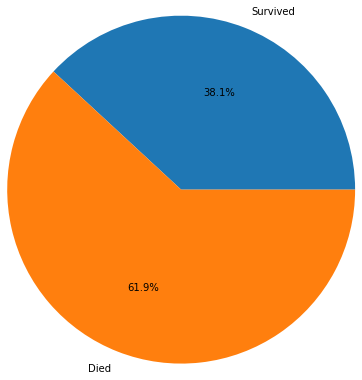

In [15]:
surv = np.sum(y_train)
died = len(y_train) - surv
plt.pie([surv,died],labels=['Survived','Died'],radius=2,autopct='%1.1f%%')
plt.show()

<AxesSubplot:>

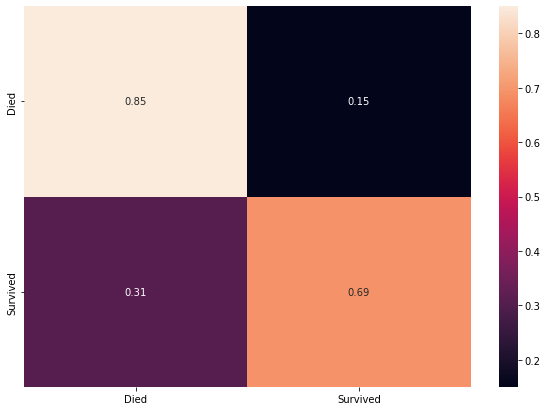

In [16]:
#Visualize performance by Normalized confusion matrix on the training set
import seaborn as sn
numClasses = 2
labels = ['Died','Survived']
conf = np.zeros([numClasses,numClasses])
guesses = model.predict(X_train)

for passenger in range(len(y_train)):
    real = y_train[passenger]
    guess = guesses[passenger]
    conf[real,guess] = conf[real,guess] + 1
 
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
sum(label)